<a href="https://colab.research.google.com/github/Joaoluislins/StreetEasy_Codecademy_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Codecademy + StreetEasy**

This is a project built as part of the Data Scientist Career Certification, provided by Codecademy. It's a partnership between StreetEasy and Codecademy to provide a real business case study.

StreetEasy is New York City's leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

The objective here is to apply Multiple Linear Regression (MLR), working with a .csv file that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

---



### Importing libraries and data









In [ ]:
import seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

manhattan_streeteasy = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv')

manhattan_streeteasy.info() ### Taking a first look into the data structure ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


### Creating the training and test sets
Considering 14 features and 1 label:

In [ ]:
### x consists of 14 feat.###
x = manhattan_streeteasy[['bedrooms',
'bathrooms',
'size_sqft',
'min_to_subway',
'floor',
'building_age_yrs',
'no_fee',
'has_roofdeck',
'has_washer_dryer',
'has_doorman',
'has_elevator',
'has_dishwasher',
'has_patio',
'has_gym']]

### y consists of 1 label ###
y = manhattan_streeteasy[['rent']]

### Creating the train/test sets ###
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

### Checking the sets ###
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


### Creating and fitting the Model

In [ ]:
apt_mlr = LinearRegression()
apt_mlr.fit(x_train, y_train) ### Training the model with our data ###
apt_predict = apt_mlr.predict(x_test) ### Using our model to predict apt prices with the test set ###


sonny_apt = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
sonny_price = apt_mlr.predict(sonny_apt)
sonny_price

array([[2393.58059075]])

### Model's accuracy

Utilizing the Residual Analysis concept, we can extract the coefficient determination from the model. The result, 80%, means that 80% of the variation in the actual price can be explained by the combination of features chosen in this model.

Plotting actual prices vs predicted prices facilitates the analysis between the actual apartment prices data and the predicted prices that resulted as outputs from our model for those same apartments.

Coefficient determination for this model is: 0.8050371975357646



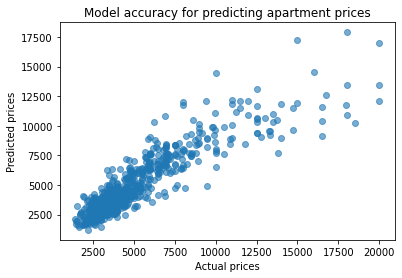

In [ ]:
print('Coefficient determination for this model is:', apt_mlr.score(x_test, y_test))
print('')
plt.scatter(y_test, apt_predict, alpha = 0.6)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Model accuracy for predicting apartment prices')
plt.show()

### Analizing feature's influence on the apt price

How and how much influence each apt feature has on the price?
By extracting the model's coefficient of each feature and plotting them on a bar graph, we can infer some relations they play on the apartment price.

In [ ]:
### Creating a DataFrame out of the coefficients ###
feat_coef = pd.DataFrame(apt_mlr.coef_, columns = ['bedrooms',
'bathrooms',
'size_sqft',
'min_to_subway',
'floor',
'building_age_yrs',
'no_fee',
'has_roofdeck',
'has_washer_dryer',
'has_doorman',
'has_elevator',
'has_dishwasher',
'has_patio',
'has_gym'])
feat_coef


,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-302.730094,1199.385995,4.799767,-24.289932,24.198242,-7.582725,-140.906648,48.850174,191.425732,-151.114534,89.408889,-57.897146,-19.319486,-38.923698


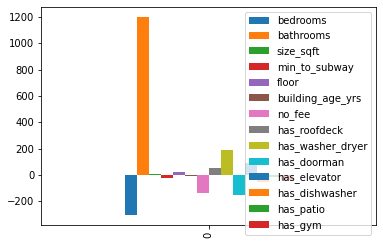

In [ ]:
plt.close('all')
feat_coef.plot.bar() ### Plotting the coefficients to vizualyze their influence ###